# 1. Install and import all the Dependencies

In [1]:
!pip install torch torchvision torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 15002 (delta 1), reused 3 (delta 1), pack-reused 14995
Receiving objects: 100% (15002/15002), 14.09 MiB | 20.82 MiB/s, done.
Resolving deltas: 100% (10287/10287), done.


In [3]:
cd yolov5

/content/yolov5


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
cd ..

/content


In [6]:
import torch
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-1-26 Python-3.8.10 torch-1.13.1+cu116 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 2. Collect the images for traning the model

In [7]:
import uuid
import os
import time
import cv2

In [8]:
Images_path=os.path.join("data","images")
Labels_path=os.path.join("data","labels")
labels=["awake","drowsy"]
number_of_images=25

if(not os.path.exists(Images_path)):
    os.makedirs(Images_path)
    
if(not os.path.exists(Labels_path)):
    os.makedirs(Labels_path)

In [9]:
cap=cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)
    
    
    for image_num in range(number_of_images):
        print("Collecting images for {}, image number {}".format(label,image_num))
        
        ret,frame=cap.read()
        
        img_name=os.path.join(Images_path,label+'.'+str(uuid.uuid1())+'.jpg')
         
        cv2.imwrite(img_name,frame)
        
        cv2.imshow('Image Collection',frame)
        time.sleep(2)     #delay between the image captures
        
        if(cv2.waitKey(1)==13):
            break
cap.release()
cv2.destroyAllWindows()

# 3. Label the images

In [10]:
!pip install labelimg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 KB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.4/361.4 KB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 8.7 MB/s eta 0:00:00
  Created wheel for labelimg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261540 sha256=b97aa8cf68528aa5221f33a13c7e4082ee4cc38c4075590ea893aa1e2ff9dcd9
  Stored in directory: /root/.cache/pip/wheels/c3/9e/49/8368f5bc5347b5e54aef95b7b03ec56af7e23ea4c16c82109c
Successfully built labelimg


### label the images by opning the data/images directory and saving the labels in data/labels directory and save the labels for yolo 

In [11]:
!labelimg

Cancel creation.
Image:/Users/vipulchauhan/Desktop/Project/pythonProject/Driver-sleepiness-detection-application/data/images/drowsy.bfed6da2-9d3d-11ed-8d22-a8667f01c3d8.jpg -> Annotation:/Users/vipulchauhan/Desktop/Project/pythonProject/Driver-sleepiness-detection-application/data/labels/drowsy.bfed6da2-9d3d-11ed-8d22-a8667f01c3d8.txt
Image:/Users/vipulchauhan/Desktop/Project/pythonProject/Driver-sleepiness-detection-application/data/images/drowsy.c3ac373e-9d3d-11ed-8d22-a8667f01c3d8.jpg -> Annotation:/Users/vipulchauhan/Desktop/Project/pythonProject/Driver-sleepiness-detection-application/data/labels/drowsy.c3ac373e-9d3d-11ed-8d22-a8667f01c3d8.txt
Image:/Users/vipulchauhan/Desktop/Project/pythonProject/Driver-sleepiness-detection-application/data/images/drowsy.c4ec304a-9d3d-11ed-8d22-a8667f01c3d8.jpg -> Annotation:/Users/vipulchauhan/Desktop/Project/pythonProject/Driver-sleepiness-detection-application/data/labels/drowsy.c4ec304a-9d3d-11ed-8d22-a8667f01c3d8.txt
Image:/Users/vipulchauh

[('drowsy', [(325, 65), (517, 65), (517, 364), (325, 364)], None, None, False)]
[('drowsy', [(279, 69), (494, 69), (494, 352), (279, 352)], None, None, False)]
[('drowsy', [(276, 71), (497, 71), (497, 359), (276, 359)], None, None, False)]
[('drowsy', [(344, 70), (539, 70), (539, 358), (344, 358)], None, None, False)]
[('drowsy', [(294, 72), (501, 72), (501, 350), (294, 350)], None, None, False)]
[('drowsy', [(309, 69), (498, 69), (498, 319), (309, 319)], None, None, False)]
[('drowsy', [(291, 68), (490, 68), (490, 333), (291, 333)], None, None, False)]
[('drowsy', [(297, 70), (495, 70), (495, 341), (297, 341)], None, None, False)]
[('drowsy', [(340, 67), (521, 67), (521, 334), (340, 334)], None, None, False)]
[('drowsy', [(328, 63), (513, 63), (513, 344), (328, 344)], None, None, False)]
[('drowsy', [(330, 62), (507, 62), (507, 342), (330, 342)], None, None, False)]
[('drowsy', [(291, 77), (495, 77), (495, 333), (291, 333)], None, None, False)]
[('drowsy', [(337, 65), (512, 65), (512,

In [12]:
import yaml
d={'path':'../data','train':'images','val':'images', 'names':{ 0:'awake', 1:'drowsy'}}
with open('dataset.yml', 'w') as yaml_file:
    yaml.dump(d,yaml_file,default_flow_style=False)

# 4. Train the model 

In [13]:
!python yolov5/train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.

# 2. Load the Model

In [14]:
from matplotlib import pyplot as plt
import numpy as np

In [15]:
model=torch.hub.load('ultralytics/yolov5', 'custom',path='yolov5/runs/train/exp/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-26 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [16]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make the Detections with Images

In [19]:
img=os.path.join('data','images',"drowsy.c4ec304a-9d3d-11ed-8d22-a8667f01c3d8.jpg")

In [20]:
result=model(img)
result.print()

image 1/1: 480x848 1 drowsy
Speed: 17.8ms pre-process, 211.0ms inference, 0.8ms NMS per image at shape (1, 3, 384, 640)


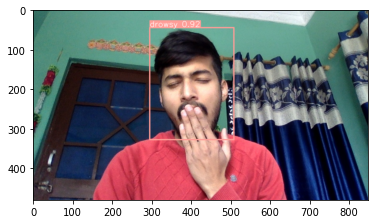

In [21]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [22]:
result.xyxy

[tensor([[295.18588,  44.77149, 508.45978, 327.14755,   0.92054,   1.00000]])]

# 4. Real time Detections

In [23]:
cap=cv2.VideoCapture(0)
while(cap.isOpened()):
    ret,frame=cap.read()
    
    #Make detections
    result=model(frame)
    
    cv2.imshow('YOLOv5',np.squeeze(result.render()))
    
    if(cv2.waitKey(1)==13):
        break

cap.release()
cv2.destroyAllWindows()
print("The camara has been released")

The camara has been released
